Dot Product: 0
Norm: 2.23606797749979
Symmetry (B - B.T):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
z^T B z: 24.801833887385698
Trace(B): 18.0
Det(B): 65.00000000000004
Eigenvalues: [13.11766327  3.44324229  1.43909444]
Orthogonality Check (U @ U.T):
 [[ 1.00000000e+00  0.00000000e+00 -8.32667268e-17]
 [ 0.00000000e+00  1.00000000e+00 -2.49800181e-16]
 [-8.32667268e-17 -2.49800181e-16  1.00000000e+00]]


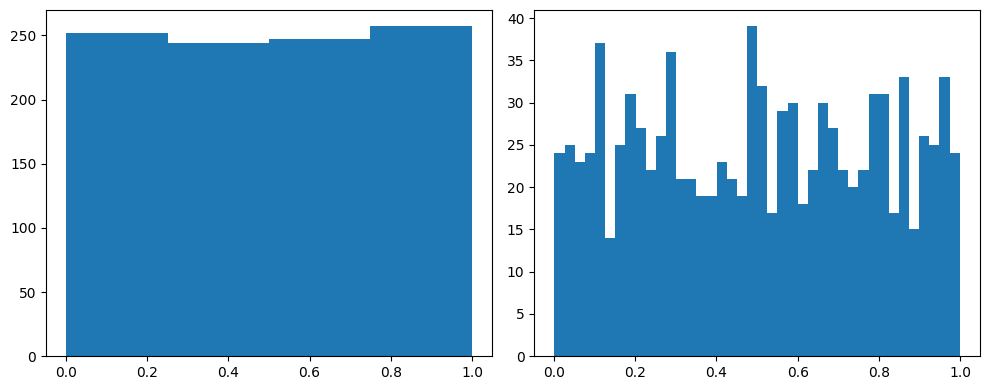

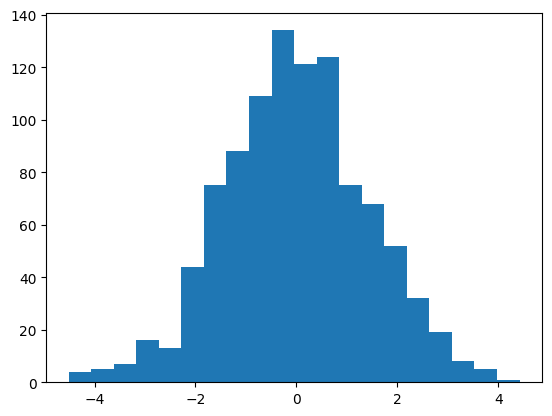

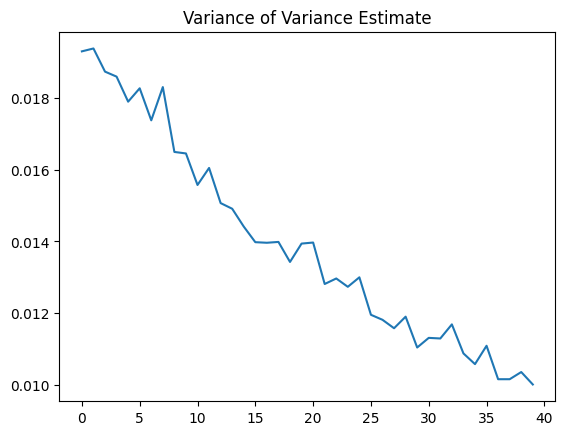

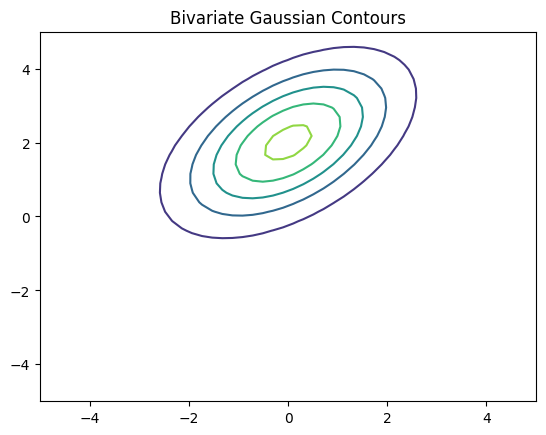

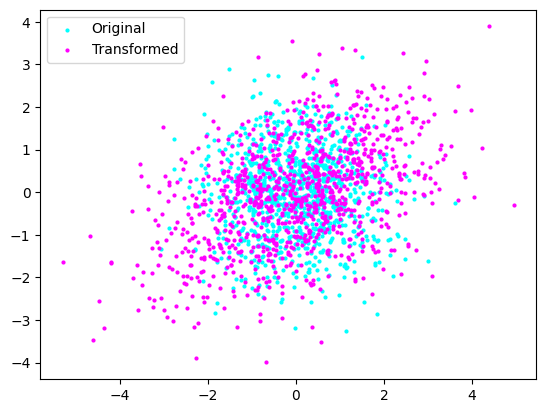

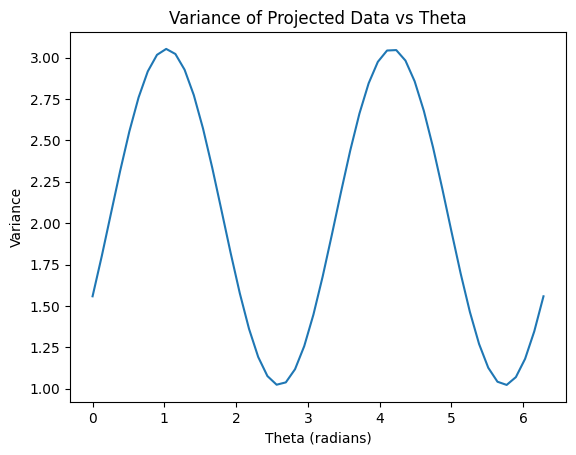

Eigenvalues: [3. 1.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
# CO544 Lab 02 Implementation
# Author: Ravindu Pathirage
# University of Peradeniya - Dept. of Computer Engineering

import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Operations
x = np.array([1, 2])
y = np.array([-2, 1])
print("Dot Product:", np.dot(x, y))
print("Norm:", np.linalg.norm(x))

B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype=float)
print("Symmetry (B - B.T):\n", B - B.T)

z = np.random.rand(3)
print("z^T B z:", z.T @ B @ z)
print("Trace(B):", np.trace(B))
print("Det(B):", np.linalg.det(B))

D, U = np.linalg.eig(B)
print("Eigenvalues:", D)
print("Orthogonality Check (U @ U.T):\n", U @ U.T)

# 2. Random Numbers and Uni-variate Densities
x = np.random.rand(1000,1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].hist(x, bins=4)
ax[1].hist(x, bins=40)
plt.tight_layout()
plt.show()

# Adding and subtracting random numbers
N = 1000
x1 = np.array([np.sum(np.random.rand(12)) - np.sum(np.random.rand(12)) for _ in range(N)])
plt.hist(x1, bins=20)
plt.show()

# 3. Uncertainty in Estimation
MaxTrial = 2000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))
for i, numSamples in enumerate(sampleSizeRange.astype(int)):
    vStrial = np.array([np.var(np.random.randn(numSamples)) for _ in range(MaxTrial)])
    plotVar[i] = np.var(vStrial)
plt.plot(plotVar)
plt.title("Variance of Variance Estimate")
plt.show()

# 4. Bi-variate Gaussian Distribution
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * (x - m).T @ Ci @ (x - m))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            Z[i, j] = gauss2D(np.array([X[i,j], Y[i,j]]), m, C)
    return X, Y, Z

nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1],[1,2]], dtype=float)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)
plt.title("Bivariate Gaussian Contours")
plt.show()

# 5. Sampling from Multivariate Gaussian
C = np.array([[2.0,1.0], [1.0,2]])
A = np.linalg.cholesky(C)
X = np.random.randn(1000,2)
Y = X @ A
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c='cyan', s=4, label='Original')
ax.scatter(Y[:,0], Y[:,1], c='magenta', s=4, label='Transformed')
ax.legend()
plt.show()

# 6. Distribution of Projections
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
    theta = thRange[n]
    u = np.array([np.sin(theta), np.cos(theta)])
    pVars[n] = np.var(Y @ u)
plt.plot(thRange, pVars)
plt.title("Variance of Projected Data vs Theta")
plt.xlabel("Theta (radians)")
plt.ylabel("Variance")
plt.show()

# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(C)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)


# CO544 Machine Learning Lab 02 Report

**Name**: \[Your Name]
**Index Number**: E20280
**Department**: Computer Engineering
**University**: University of Peradeniya
**Date**: 12-13 March 2024

---

## Objective

The objective of this laboratory exercise was to study two uses of the properties of multivariate Gaussian densities:

1. **Sampling**: Drawing samples from a multivariate Gaussian distribution.
2. **Projection**: Understanding how projections transform Gaussian distributions.

---

## Preliminaries

Before diving into the experiments, we revisited some basic matrix and vector operations in Python, such as:

* Dot product, vector norms, matrix symmetry, matrix multiplication
* Quadratic forms and trace of matrices
* Determinant, eigenvalues, eigenvectors

We verified that the eigenvectors of a symmetric matrix form an orthogonal set using `np.linalg.eig()` and validated their orthogonality by computing $U U^T = I$.

---

## 1. Random Numbers and Uni-variate Densities

### Uniform Random Numbers

We generated 1000 uniform random numbers and plotted histograms with varying bin sizes.

#### Observations:

* The histograms did not appear flat despite the uniform distribution, due to the limited sample size.
* Increasing the number of bins revealed finer variations in the distribution.
* More data would result in flatter, more uniform-looking histograms.

### Sum of Uniform Random Numbers

We generated random variables by summing and subtracting 12 uniform random numbers:

* Resulting distribution approximated a Gaussian due to the **Central Limit Theorem (CLT)**.
* Increasing the number of added/subtracted random numbers made the histogram appear increasingly Gaussian.

---

## 2. Uncertainty in Estimation

We examined the variability of variance estimates of normally distributed random data as a function of sample size.

#### Observations:

* As sample size increased, the variance of the estimated variances decreased.
* Demonstrates that more data leads to more reliable statistical estimates.

---

## 3. Bi-variate Gaussian Distribution

We implemented a function to evaluate the probability density of a 2D Gaussian distribution and plotted contour plots for visualization.

#### Contour Plots for Different Parameters:

1. $\mu = [2.4, 3.2], \Sigma = \begin{bmatrix}2 & -1 \\ -1 & 2\end{bmatrix}$
2. $\mu = [1.2, 0.2], \Sigma = \begin{bmatrix}2 & 0 \\ 0 & 4\end{bmatrix}$
3. $\mu = [2.4, 3.2], \Sigma = \begin{bmatrix}2 & 0 \\ 0 & 2\end{bmatrix}$

#### Observations:

* Off-diagonal elements in $\Sigma$ introduce correlation, resulting in elliptical contours with rotated axes.

---

## 4. Sampling from Multivariate Gaussian

Using Cholesky decomposition, we transformed standard Gaussian samples into samples from a Gaussian distribution with:

$$
\mu = [0, 0], \quad \Sigma = \begin{bmatrix}2 & 1 \\ 1 & 2\end{bmatrix}
$$

#### Scatter Plot:

* Original samples (cyan) were circular.
* Transformed samples (magenta) formed an elongated elliptical cloud, indicating correlation.

---

## 5. Distribution of Projections

We projected the 2D Gaussian samples onto unit vectors parameterized by $\theta$ in $[0, 2\pi]$ and plotted the variance of the projected data.

#### Observations:

* The variance of projections varied sinusoidally with $\theta$.
* **Maximum and Minimum Variances** corresponded to the **eigenvalues** of $\Sigma$.
* Projection directions at maxima/minima aligned with the **eigenvectors** of $\Sigma$.

#### Analytical Confirmation:

* The sinusoidal nature stems from the quadratic form of projections involving symmetric covariance matrices.

---

## Conclusion

This lab demonstrated:

* Practical generation and visualization of multivariate Gaussian distributions.
* The fundamental connection between covariance matrices, eigenvalues/eigenvectors, and projections.
* How sample size affects the uncertainty of statistical estimates.

This foundational understanding is crucial for advanced topics in machine learning, such as Principal Component Analysis (PCA) and Gaussian Mixture Models (GMMs).

---

## References

1. **The Matrix Cookbook** by K.B. Petersen and M.S. Pedersen
2. **"It Had to Be U - The SVD Song"** (YouTube)
3. Course material from **Foundations of Machine Learning**, University of Southampton

---

**End of Report**
